<a href="https://colab.research.google.com/github/adithi20/-CSE_Projects/blob/main/Lstm_train_normal(ct_images).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Conv2D, Flatten, Reshape
from tensorflow.keras.models import Sequential

# Define the desired dimensions for resizing
height = 100  # Example height
width = 100   # Example width

# Load and preprocess images
image_paths = ["/content/10.png", "/content/11.png", "/content/12.png ",
               "/content/13.png", "/content/16.png","/content/17.png" ,"/content/18.png"," /content/19.png" ,"/content/2.png" ," /content/20.png" , "/content/3.png" , " /content/4.png","/content/5.png"," /content/6.png" , "/content/7.png" ," /content/8.png" , "/content/n6.jpg" , " /content/n7.png" ," /content/n8.jpg"  ]
image_data = []
for path in image_paths:
    image = cv2.imread(path)
    if image is None:
        print("Error: Unable to load image from path:", path)
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    # Resize image to desired dimensions
    image = cv2.resize(image, (width, height))
    image_data.append(image)

# Convert list of images to numpy array
image_data = np.array(image_data)

# Organize image sequences (example: create sequences of length 3)
sequence_length = 3
sequences = []
for i in range(len(image_data) - sequence_length + 1):
    sequence = image_data[i:i+sequence_length]
    sequences.append(sequence)
sequences = np.array(sequences)

# Define LSTM model
model = Sequential([
    TimeDistributed(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), input_shape=(sequence_length, height, width, 3)),
    TimeDistributed(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')),
    TimeDistributed(Flatten()),
    LSTM(units=128, return_sequences=True),
    TimeDistributed(Dense(units=height * width * 3, activation='sigmoid')),  # Output a single image (sequence)
    Reshape((sequence_length, height, width, 3))  # Reshape to sequence of images
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss for image prediction

# Train the model
history = model.fit(sequences, sequences, epochs=10, batch_size=32, validation_split=0.2)



Error: Unable to load image from path: /content/12.png 
Error: Unable to load image from path:  /content/19.png
Error: Unable to load image from path:  /content/20.png
Error: Unable to load image from path:  /content/4.png
Error: Unable to load image from path:  /content/6.png
Error: Unable to load image from path:  /content/8.png
Error: Unable to load image from path:  /content/n7.png
Error: Unable to load image from path:  /content/n8.jpg
Epoch 1/10
1/1 [==============================] - 36s 36s/step - loss: 20812.0176 - val_loss: 18749.7832
Epoch 2/10
1/1 [==============================] - 20s 20s/step - loss: 20810.9258 - val_loss: 18747.9336
Epoch 3/10
1/1 [==============================] - 20s 20s/step - loss: 20808.9648 - val_loss: 18746.0273
Epoch 4/10
1/1 [==============================] - 20s 20s/step - loss: 20806.9043 - val_loss: 18743.9395
Epoch 5/10
1/1 [==============================] - 20s 20s/step - loss: 20804.6816 - val_loss: 18741.7773
Epoch 6/10
1/1 [==============

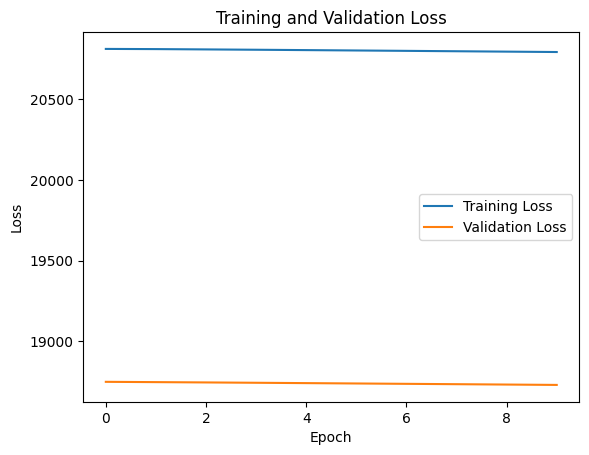

1/1 [==============================] - 1s 1s/step


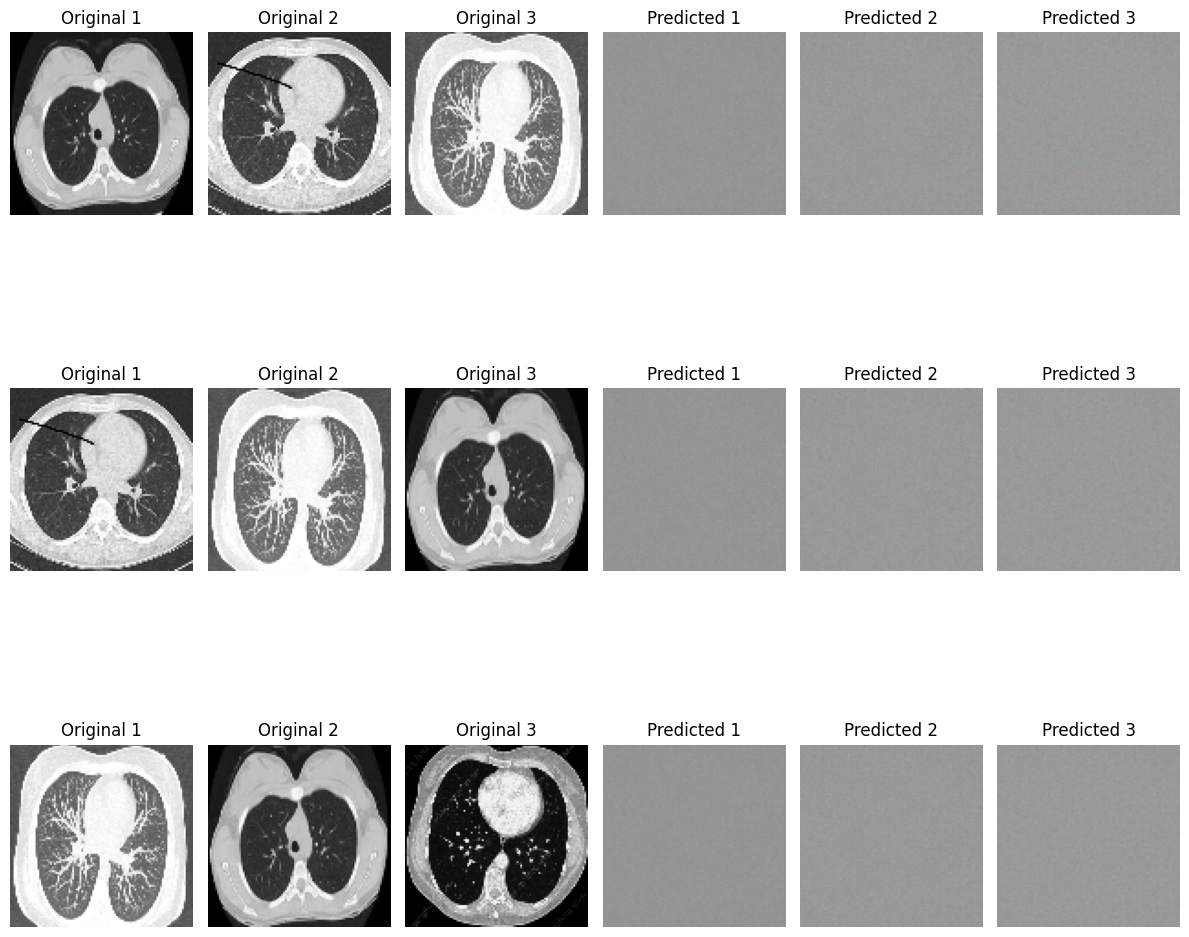

In [2]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Predict some sample sequences and visualize the results
sample_indices = [0, 1, 2]  # Indices of sample sequences to visualize
num_samples = len(sample_indices)

# Predictions
predicted_images = model.predict(sequences)

# Visualize sample sequences
plt.figure(figsize=(12, 4 * num_samples))
for i, idx in enumerate(sample_indices):
    for j in range(sequence_length):
        plt.subplot(num_samples, sequence_length * 2, i * sequence_length * 2 + j + 1)
        plt.imshow(sequences[idx][j])
        plt.title(f'Original {j+1}')
        plt.axis('off')
        plt.subplot(num_samples, sequence_length * 2, i * sequence_length * 2 + j + sequence_length + 1)
        plt.imshow(predicted_images[idx][j])
        plt.title(f'Predicted {j+1}')
        plt.axis('off')
plt.tight_layout()
plt.show()

In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Conv2D, Flatten, Reshape
from tensorflow.keras.models import Sequential

# Define the desired dimensions for resizing
height = 100  # Example height
width = 100   # Example width

# Load and preprocess images
image_paths = ["/content/10.png", "/content/11.png", "/content/12.png",
               "/content/13.png", "/content/16.png", "/content/17.png", "/content/18.png",
               "/content/19.png", "/content/2.png", "/content/20.png", "/content/3.png",
               "/content/4.png", "/content/5.png", "/content/6.png", "/content/7.png",
               "/content/8.png", "/content/n6.jpg", "/content/n7.png", "/content/n8.jpg"]

image_data = []
for path in image_paths:
    image = cv2.imread(path)
    if image is None:
        print("Error: Unable to load image from path:", path)
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    # Resize image to desired dimensions
    image = cv2.resize(image, (width, height))
    image_data.append(image)

# Convert list of images to numpy array
image_data = np.array(image_data)

# Organize image sequences (example: create sequences of length 3)
sequence_length = 3
sequences = []
for i in range(len(image_data) - sequence_length + 1):
    sequence = image_data[i:i+sequence_length]
    sequences.append(sequence)
sequences = np.array(sequences)

# Define LSTM model
model = Sequential([
    TimeDistributed(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), input_shape=(sequence_length, height, width, 3)),
    TimeDistributed(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')),
    TimeDistributed(Flatten()),
    LSTM(units=128, return_sequences=True),
    TimeDistributed(Dense(units=height * width * 3, activation='sigmoid')),  # Output a single image (sequence)
    Reshape((sequence_length, height, width, 3))  # Reshape to sequence of images
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss for image prediction

# Train the model
history = model.fit(sequences, sequences, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1/1 [==============================] - 17s 17s/step - loss: 20388.8613 - val_loss: 20714.8672
Epoch 2/10
1/1 [==============================] - 12s 12s/step - loss: 20387.4961 - val_loss: 20712.8691
Epoch 3/10
1/1 [==============================] - 12s 12s/step - loss: 20385.4805 - val_loss: 20710.7246
Epoch 4/10
1/1 [==============================] - 11s 11s/step - loss: 20383.3223 - val_loss: 20708.3848
Epoch 5/10
1/1 [==============================] - 11s 11s/step - loss: 20380.9668 - val_loss: 20705.9609
Epoch 6/10
1/1 [==============================] - 11s 11s/step - loss: 20378.4805 - val_loss: 20703.5762
Epoch 7/10
1/1 [==============================] - 13s 13s/step - loss: 20376.0664 - val_loss: 20701.1660
Epoch 8/10
1/1 [==============================] - 12s 12s/step - loss: 20373.6172 - val_loss: 20698.7520
Epoch 9/10
1/1 [==============================] - 12s 12s/step - loss: 20371.1836 - val_loss: 20696.2793
Epoch 10/10
1/1 [==============================] - 13s 

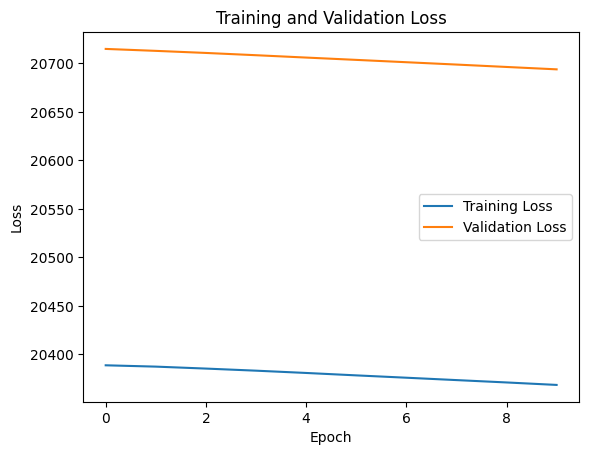

1/1 [==============================] - 2s 2s/step


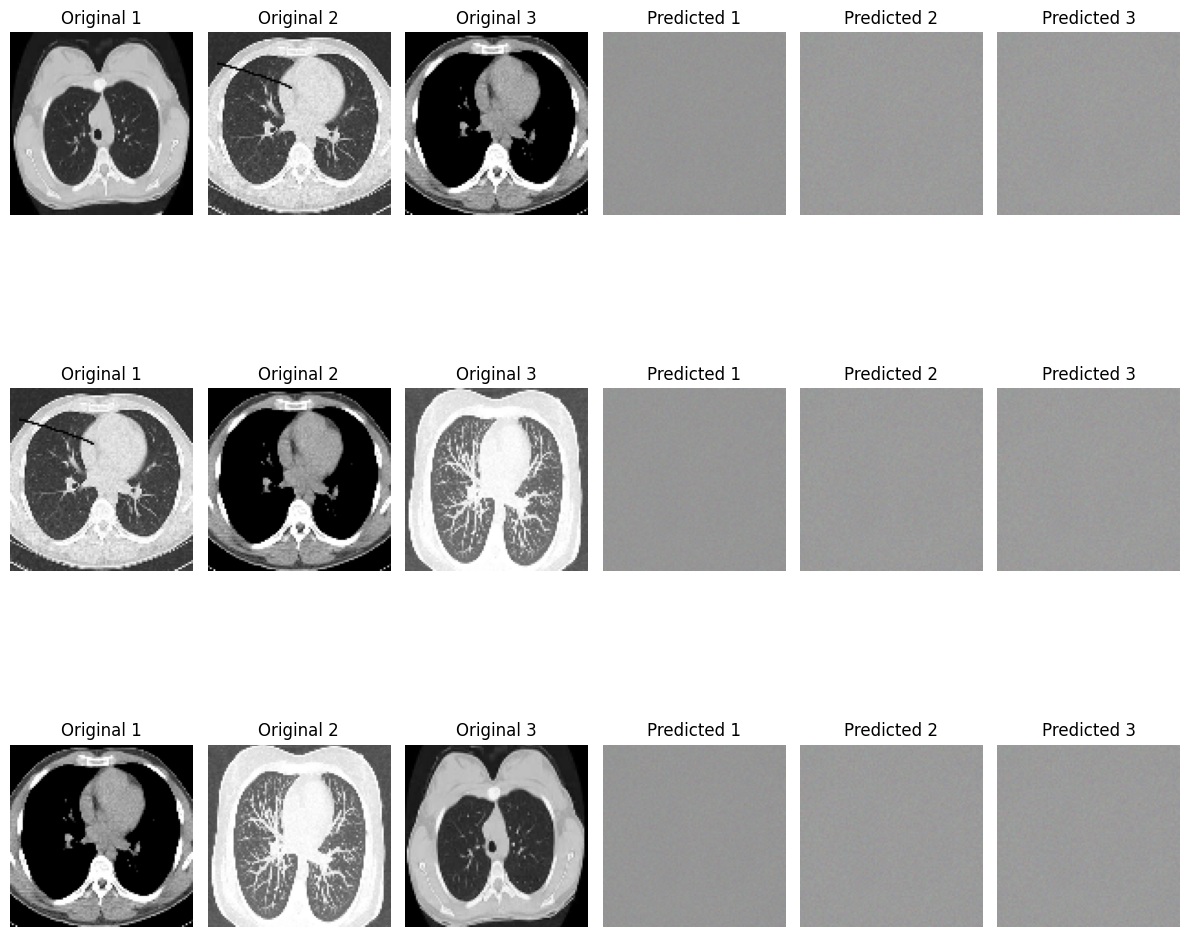

In [2]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Predict some sample sequences and visualize the results
sample_indices = [0, 1, 2]  # Indices of sample sequences to visualize
num_samples = len(sample_indices)

# Predictions
predicted_images = model.predict(sequences)

# Visualize sample sequences
plt.figure(figsize=(12, 4 * num_samples))
for i, idx in enumerate(sample_indices):
    for j in range(sequence_length):
        plt.subplot(num_samples, sequence_length * 2, i * sequence_length * 2 + j + 1)
        plt.imshow(sequences[idx][j])
        plt.title(f'Original {j+1}')
        plt.axis('off')
        plt.subplot(num_samples, sequence_length * 2, i * sequence_length * 2 + j + sequence_length + 1)
        plt.imshow(predicted_images[idx][j])
        plt.title(f'Predicted {j+1}')
        plt.axis('off')
plt.tight_layout()
plt.show()